In [235]:
# general:
import pandas as pd
import numpy as np
import catboost as cat
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV       # hyperparam selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef  # matric for performance evaluation in training

In [236]:
import sys
sys.path.append("../data_process/")
from importlib import reload
reload(ml)
import ML_func as ml
import data_cleaner as dc
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [237]:
grid_result = dc.load_py("catboost_grid_result.pkl")


In [242]:
grid_result.head(100)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_l2_leaf_reg,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.210669,0.120630,0.003697,0.000403,3,100,0.0,0.003,"{'depth': 3, 'iterations': 100, 'l2_leaf_reg': 0.0, 'learning_rate': 0.003}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2903,0.991199,0.076872,0.003799,0.000121,8,200,5.5,0.09,"{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 5.5, 'learning_rate': 0.09}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2904,0.982025,0.056673,0.003915,0.000432,8,200,5.5,0.3,"{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 5.5, 'learning_rate': 0.3}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2905,0.914569,0.045270,0.003879,0.000132,8,200,6.0,0.003,"{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 6.0, 'learning_rate': 0.003}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2906,0.967775,0.106905,0.003945,0.000432,8,200,6.0,0.006,"{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 6.0, 'learning_rate': 0.006}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2907,0.932376,0.055728,0.003794,0.000131,8,200,6.0,0.009,"{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 6.0, 'learning_rate': 0.009}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2908,0.934850,0.063939,0.003948,0.000348,8,200,6.0,0.03,"{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 6.0, 'learning_rate': 0.03}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2909,0.937332,0.026476,0.003824,0.000103,8,200,6.0,0.06,"{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 6.0, 'learning_rate': 0.06}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2910,1.012809,0.110456,0.004120,0.000540,8,200,6.0,0.09,"{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 6.0, 'learning_rate': 0.09}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2911,0.968633,0.021768,0.003902,0.000359,8,200,6.0,0.3,"{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 6.0, 'learning_rate': 0.3}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [109]:
# hyperparam tuning with one data:
df = train_set[1].copy()
x_train = df
y_train = x_train.pop('progress')
cat_features = ['PTGENDER', 'PTETHCAT', 'PTMARRY', 'PTRACCAT']

In [223]:
reload(ct)
# import catboost_train as ct
params = {
    'depth':list(range(3,11)),                       # 6-10 is recommend
    'learning_rate':[0.003,0.006, 0.009,0.03,0.06,0.09,0.3],   # default: 0.03
    'iterations':[100,200,300,500,1000,2000],
    'l2_leaf_reg':list(range(0,6)),  # default 3
    
}
ct.catboost_greedy(x_train, y_train, params=params, cat_features=cat_features)


Fitting 5 folds for each of 2016 candidates, totalling 10080 fits
[CV 1/5; 1/2016] START depth=3, iterations=100, l2_leaf_reg=0, learning_rate=0.003
[CV 1/5; 1/2016] END depth=3, iterations=100, l2_leaf_reg=0, learning_rate=0.003;, score=0.005 total time=   0.1s
[CV 2/5; 1/2016] START depth=3, iterations=100, l2_leaf_reg=0, learning_rate=0.003
[CV 2/5; 1/2016] END depth=3, iterations=100, l2_leaf_reg=0, learning_rate=0.003;, score=0.429 total time=   0.2s
[CV 3/5; 1/2016] START depth=3, iterations=100, l2_leaf_reg=0, learning_rate=0.003
[CV 3/5; 1/2016] END depth=3, iterations=100, l2_leaf_reg=0, learning_rate=0.003;, score=0.396 total time=   0.2s
[CV 4/5; 1/2016] START depth=3, iterations=100, l2_leaf_reg=0, learning_rate=0.003
[CV 4/5; 1/2016] END depth=3, iterations=100, l2_leaf_reg=0, learning_rate=0.003;, score=0.565 total time=   0.2s
[CV 5/5; 1/2016] START depth=3, iterations=100, l2_leaf_reg=0, learning_rate=0.003
[CV 5/5; 1/2016] END depth=3, iterations=100, l2_leaf_reg=0, le

[CV 4/5; 9/2016] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.006;, score=0.565 total time=   0.3s
[CV 5/5; 9/2016] START depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.006
[CV 5/5; 9/2016] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.006;, score=0.481 total time=   0.2s
[CV 1/5; 10/2016] START depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.009
[CV 1/5; 10/2016] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.009;, score=0.005 total time=   0.2s
[CV 2/5; 10/2016] START depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.009
[CV 2/5; 10/2016] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.009;, score=0.460 total time=   0.2s
[CV 3/5; 10/2016] START depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.009
[CV 3/5; 10/2016] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.009;, score=0.396 total time=   0.2s
[CV 4/5; 10/2016] START depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.009
[CV 4/5;

[CV 1/5; 18/2016] END depth=3, iterations=100, l2_leaf_reg=2, learning_rate=0.03;, score=0.125 total time=   0.3s
[CV 2/5; 18/2016] START depth=3, iterations=100, l2_leaf_reg=2, learning_rate=0.03
[CV 2/5; 18/2016] END depth=3, iterations=100, l2_leaf_reg=2, learning_rate=0.03;, score=0.453 total time=   0.3s
[CV 3/5; 18/2016] START depth=3, iterations=100, l2_leaf_reg=2, learning_rate=0.03
[CV 3/5; 18/2016] END depth=3, iterations=100, l2_leaf_reg=2, learning_rate=0.03;, score=0.489 total time=   0.3s
[CV 4/5; 18/2016] START depth=3, iterations=100, l2_leaf_reg=2, learning_rate=0.03
[CV 4/5; 18/2016] END depth=3, iterations=100, l2_leaf_reg=2, learning_rate=0.03;, score=0.544 total time=   0.2s
[CV 5/5; 18/2016] START depth=3, iterations=100, l2_leaf_reg=2, learning_rate=0.03
[CV 5/5; 18/2016] END depth=3, iterations=100, l2_leaf_reg=2, learning_rate=0.03;, score=0.505 total time=   0.2s
[CV 1/5; 19/2016] START depth=3, iterations=100, l2_leaf_reg=2, learning_rate=0.06
[CV 1/5; 19/201

[CV 3/5; 26/2016] END depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.06;, score=0.517 total time=   0.3s
[CV 4/5; 26/2016] START depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.06
[CV 4/5; 26/2016] END depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.06;, score=0.548 total time=   0.2s
[CV 5/5; 26/2016] START depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.06
[CV 5/5; 26/2016] END depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.06;, score=0.481 total time=   0.3s
[CV 1/5; 27/2016] START depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.09
[CV 1/5; 27/2016] END depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.09;, score=0.333 total time=   0.3s
[CV 2/5; 27/2016] START depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.09
[CV 2/5; 27/2016] END depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.09;, score=0.377 total time=   0.2s
[CV 3/5; 27/2016] START depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.09
[CV 3/5; 27/201

[CV 5/5; 34/2016] END depth=3, iterations=100, l2_leaf_reg=4, learning_rate=0.09;, score=0.472 total time=   0.3s
[CV 1/5; 35/2016] START depth=3, iterations=100, l2_leaf_reg=4, learning_rate=0.3
[CV 1/5; 35/2016] END depth=3, iterations=100, l2_leaf_reg=4, learning_rate=0.3;, score=0.303 total time=   0.3s
[CV 2/5; 35/2016] START depth=3, iterations=100, l2_leaf_reg=4, learning_rate=0.3
[CV 2/5; 35/2016] END depth=3, iterations=100, l2_leaf_reg=4, learning_rate=0.3;, score=0.363 total time=   0.2s
[CV 3/5; 35/2016] START depth=3, iterations=100, l2_leaf_reg=4, learning_rate=0.3
[CV 3/5; 35/2016] END depth=3, iterations=100, l2_leaf_reg=4, learning_rate=0.3;, score=0.568 total time=   0.2s
[CV 4/5; 35/2016] START depth=3, iterations=100, l2_leaf_reg=4, learning_rate=0.3
[CV 4/5; 35/2016] END depth=3, iterations=100, l2_leaf_reg=4, learning_rate=0.3;, score=0.456 total time=   0.3s
[CV 5/5; 35/2016] START depth=3, iterations=100, l2_leaf_reg=4, learning_rate=0.3
[CV 5/5; 35/2016] END de

KeyboardInterrupt: 

In [218]:

# params:
params = {
    'depth':list(range(3,11)),                       # 6-10 is recommend
    'learning_rate':[0.003,0.006, 0.009,0.03,0.06,0.09,0.3],   # default: 0.03
    'iterations':[100,200,300,500,1000,2000],
    'l2_leaf_reg':list(range(0,6)),  # default 3
    
}
mod_cat = cat.CatBoostClassifier(cat_features=cat_features, random_seed=0, verbose=1000, 
                                 early_stopping_rounds=100
                                )
cv_cat = GridSearchCV(
    estimator = mod_cat, 
    param_grid=params,
    cv=5,
    scoring = ['roc_auc','matthews_corrcoef']  # because outcome imbalanced
)
cv_cat.fit(x_train, y_train)       
display( pd.DataFrame(cv_cat.cv_results_).sort_values("rank_test_score").head(10)  )
# cat_params = cv_cat.best_params_
cat_params = ml.vote_hyperparam(cv_cat.cv_results_, 1) # top 1 as hyperparam

ValueError: For multi-metric scoring, the parameter refit must be set to a scorer key or a callable to refit an estimator with the best parameter setting on the whole data and make the best_* attributes available for that metric. If this is not needed, refit should be set to False explicitly. True was passed.

In [119]:
from catboost import Pool, cv 
cat_params = ml.vote_hyperparam(cv_cat.cv_results_, 1)
cat_features = ['PTGENDER', 'PTETHCAT', 'PTMARRY', 'PTRACCAT']
it = 2000
cat_params['iterations'] = it
cat_params['early_stopping_rounds'] = it//20
cat_params["loss_function"] = "Logloss"
print(cat_params)
# choose one of the 5 imputed dataset for final modeling:
for i, df in train_set.items():
    x_train = df.copy()
    y_train = x_train.pop('progress')
    cv_data = Pool(data=x_train, label=y_train, cat_features=cat_features)
    cv_result = cv(cv_data, params=cat_params, logging_level="Silent",
                   partition_random_seed = 5,
                   fold_count=5, stratified=True)  # default is stratified
    print(f"Dataset {i}, Iteration {np.argmin(cv_result['test-CrossEntropy-mean'])} has lowest CrossEntropy: \
{np.min(cv_result['test-CrossEntropy-mean'])}")   # 


{'depth': 6, 'l2_leaf_reg': 2, 'learning_rate': 0.03, 'iterations': 2000, 'early_stopping_rounds': 100, 'loss_function': 'CrossEntropy'}
Dataset 1, Iteration 228 has lowest log loss: 0.2623170653995748
Dataset 2, Iteration 369 has lowest log loss: 0.25341289850465615
Dataset 3, Iteration 305 has lowest log loss: 0.27104921699878337
Dataset 4, Iteration 207 has lowest log loss: 0.2656591623673335
Dataset 5, Iteration 222 has lowest log loss: 0.2595931635652817


In [153]:
np.argmin(cv_result.iloc[:,1])
float('Inf')

inf

In [ ]:
from sklearn.model_selection import StratifiedKFold



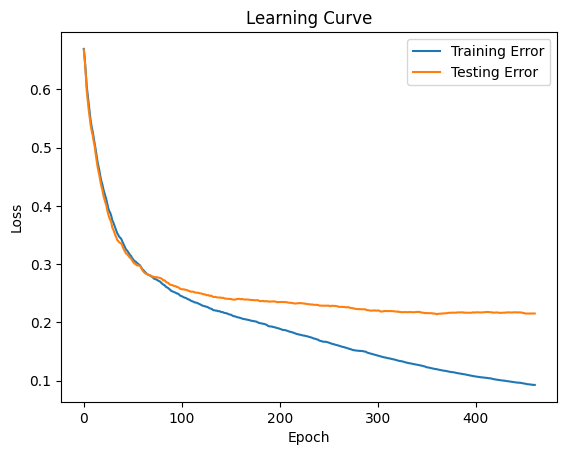

Setup: {'depth': 3, 'l2_leaf_reg': 2, 'learning_rate': 0.03, 'iterations': 1000, 'early_stopping_rounds': 100, 'loss_function': 'CrossEntropy'}, 5-fold CV with stratification


In [193]:
df = train_set[2].copy()  # > use dataset 5 for model training due to lowest loss
x_train = df.copy()       # dataset 1 may have bias 
y_train = x_train.pop('progress')
x_test = test_set[1].copy()       # for drawing one learning curve as represent
y_test = x_test.pop('progress')
cat_features = ['PTGENDER', 'PTETHCAT', 'PTMARRY', 'PTRACCAT']
# reset the tree number based on CV results:
cat_params["loss_function"] = "Logloss"
cat_params["iterations"] = 1000
cat_params['early_stopping_rounds'] = 100
cat_params["loss_function"] = "CrossEntropy"
## final model training
cv_model = ml.catboost_cv(data=x_train, label=y_train, fold=5, 
               params=cat_params, cat_features=cat_features, seed=777)


In [126]:
result_cat = {}   # to save avg train/test predicted outcome & prob 
result_cat['train_pred'] = mod_cat.predict(x_train)
result_cat['train_prob'] = mod_cat.predict_proba(x_train)[:,1]
for i, df_test in test_set.items():
    x_test = df_test.copy()
    y_test = x_test.pop('progress')
    if 'test_pred' in result_cat:
        result_cat['test_pred'] += mod_cat.predict(x_test)
        result_cat['test_prob'] += mod_cat.predict_proba(x_test)[:,1]
    else: # 1st iteration
        result_cat['test_pred'] = mod_cat.predict(x_test)
        result_cat['test_prob'] = mod_cat.predict_proba(x_test)[:,1]
result_cat['test_pred'] = np.where(result_cat['test_pred'] >= 3, 1, 0)
result_cat['test_prob'] = result_cat['test_prob']/5
dc.save_py(result_cat, "../output/result_cat_imp.pkl")

In [144]:
cat_feat = dict(zip(mod_cat.feature_names_, 
                    mod_cat.get_feature_importance() ))
# dc.save_py(cat_feat, "../output/cat_feat")
# confusion_matrix(y_test, mod_cat.predict(x_test))
cat_feat

{'AV45': 0.35752583029140284,
 'EcogSPOrgan': 0.25207563585439996,
 'EcogSPDivatt': 0.2417519361063477,
 'EcogSPVisspat': 0.38125130858789424,
 'EcogSPPlan': 0.261054059717208,
 'EcogPtOrgan': 0.27200497541243807,
 'EcogSPTotal': 0.3218369936569415,
 'EcogSPMem': 0.29325619208888537,
 'MOCA': 0.15826405925951367,
 'EcogSPLang': 0.40061121893268986,
 'EcogPtDivatt': 0.3244667756023878,
 'EcogPtVisspat': 0.22146186269123982,
 'EcogPtLang': 0.23048943309298683,
 'EcogPtMem': 0.25939603495772096,
 'EcogPtTotal': 0.31865684163786423,
 'EcogPtPlan': 0.31254986386369327,
 'TAU_UPENN': 0.2621918533535059,
 'PTAU_UPENN': 0.14115619640685098,
 'ABETA_UPENN': 0.2106767975681598,
 'FDG': 0.17897272160925218,
 'Entorhinal': 0.19974357774928286,
 'Fusiform': 0.20740452802701803,
 'MidTemp': 0.24227210229587196,
 'Hippocampus': 0.1855376611849286,
 'Ventricles': 0.1765246147609712,
 'WholeBrain': 0.2001887155264081,
 'IMAGEUID': 0.22298404861414717,
 'ICV': 0.20619079365980325,
 'TRABSCOR': 0.2049836

array([[248,  85],
       [  9,  19]])

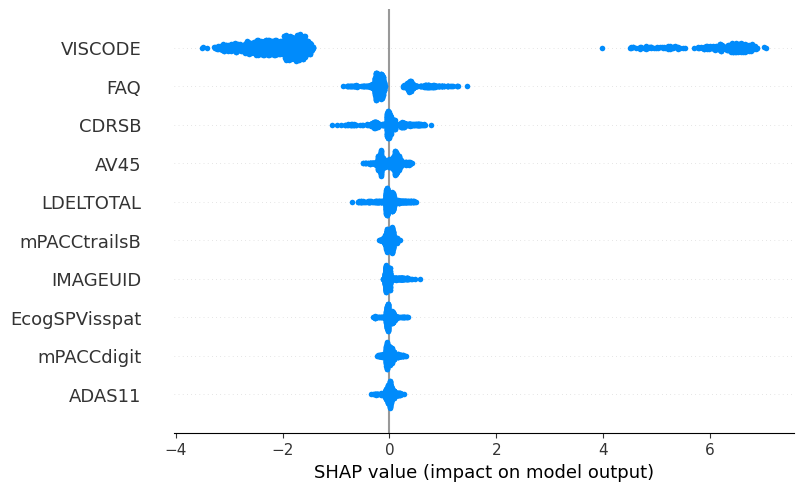

In [104]:
import shap
explainer = shap.TreeExplainer(mod_cat)
# explainer = shap.Explainer(mod_cat)
for c in cat_features:
    x_train[c] = x_train[c].astype('category')
shap_values = explainer.shap_values(x_train)
#shap.plots.beeswarm(shap_values)
shap.summary_plot(shap_values, max_display=10, feature_names=x_train.columns)